In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("/content/drive/MyDrive/allsettocompletevsoon/nov24"))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
from skimage.feature import hog
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage import exposure
from matplotlib import pyplot as plt
from skimage import color
from skimage import io
%matplotlib inline

In [ ]:
#os.listdir('./')

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/fer2013.csv') #change this directory based on where you uploaded the files on google drive
print (x.values.shape)

(35887, 3)


In [ ]:
x.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data = x.values
print (data.shape)
print (data[0, 0])

(35887, 3)
0


In [ ]:
y = data[:, 0]
pixels = data[:, 1]
print (type(pixels))

print (len(pixels[0]))
print (pixels[10][10])
pixels.shape[0]


<class 'numpy.ndarray'>
8287
3


35887

In [ ]:
X = np.zeros((pixels.shape[0], 48*48))

for ix in range(X.shape[0]):
#for ix in range(100):
    p = pixels[ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])



In [ ]:
print(X.shape)

(35887, 2304)


In [ ]:
print(X[0])

[ 70.  80.  82. ... 106. 109.  82.]


In [ ]:
X

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]])

In [ ]:
y

array([0, 0, 2, ..., 0, 3, 2], dtype=object)

In [ ]:
original_img = X
original_img.shape

(35887, 2304)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


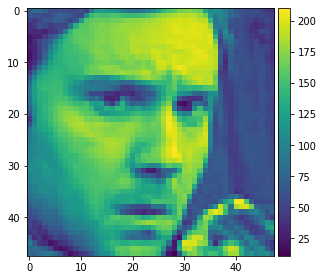

In [ ]:
imshow(original_img[0].reshape((48,48)))
# plt.imshow(original_img[0].reshape((48, 48)), interpolation='none', cmap='gray')

In [ ]:
fusion_images = []
for i in range(len(original_img)):
#for i in range(100):
  fd, hog_image = hog((original_img[i]).reshape(48,48), orientations=8, pixels_per_cell=(6,6), visualize = True)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 100))
  imgGray = color.rgb2gray((original_img[i].reshape(48,48)+ hog_image_rescaled.reshape(48,48)))
  fusion_images.append(imgGray)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [ ]:
 imgGray=np.array( imgGray)

In [ ]:
print(imgGray)

[[ 19.          13.          14.         ... 108.          95.
   86.        ]
 [ 16.          17.00177865  15.         ... 105.13756272  94.06179073
   90.        ]
 [ 10.           9.01027778  10.01205642 ... 101.19935346  93.
   95.        ]
 ...
 [ 18.          14.00202225  16.01125632 ...  55.12027778  64.12027778
   95.        ]
 [ 15.          15.00117851  13.00805556 ... 123.         171.
  192.        ]
 [ 16.          14.          13.         ... 189.         199.
  201.        ]]


In [ ]:
fusion_images = np.array(fusion_images)
fusion_images=fusion_images.astype(int)

In [ ]:
fusion_images.shape

(35887, 48, 48)

In [ ]:
fusion = fusion_images.reshape(35887, 2304)
#fusion = fusion_images.reshape(100, 2304)
# np.savetxt("/content/drive/MyDrive/allsettocompletevsoon/nov24/fer2013teinteger.csv", fusion, delimiter =" ",fmt ='% s')

np.savetxt("/content/drive/MyDrive/allsettocompletevsoon/nov24/nfernov28.csv", fusion, delimiter =" ",fmt ='% s')

In [ ]:
# fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
#                     cells_per_block=(2, 2), visualize=True, multichannel=True)
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# img=hog_image_rescaled+imgGray

In [ ]:
# #df = pd.read_csv("/content/drive/MyDrive/allsettocompletevsoon/nov24/fer2013test.csv")
# x = pd.read_csv('/content/drive/MyDrive/allsettocompletevsoon/nov24/fer2013test.csv')
# new_file = open("/content/drive/MyDrive/allsettocompletevsoon/nov24/shaz.csv", "a")
# new_file.write(f'{x.columns[0]},{x.columns[1]},{x.columns[2]} \n')
# for i in range(len(x)):
#   new_file.write(f'{x.iloc[i,0]},{x.iloc[i,1]},{x.iloc[i,2]} \n')
# new_file.close()

In [ ]:
x

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
